### Limpieza de datos

In [2]:
#Importación de librerías necesarias para leer el archivo
import pandas as pd
import os

In [3]:
# Cambio de directorio y carga de archivo
os.chdir(r'C:\Users\einzw\Downloads')
df= pd.read_csv('fifa_eda.csv')

In [3]:
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [ ]:
# Buscamos cuántos valores nulos hay en el dataframe
print(df[df.isnull().any(axis=1)])

ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [12]:
# Valores nulos en la variable Club
df[df[['Club']].isnull().any(axis=1)]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
452,207439,L. Paredes,24,Argentina,80,85,NaN,NaN,0.0,Right,2.0,4.0,CM,2016,NaN,5.916667,165.0,4585.060806
538,156713,A. Granqvist,33,Sweden,80,80,NaN,NaN,0.0,Right,2.0,2.0,LCB,2016,NaN,6.333333,185.0,4585.060806
568,229909,A. Lunev,26,Russia,79,81,NaN,NaN,0.0,Right,1.0,1.0,GK,2016,NaN,6.166667,176.0,4585.060806
677,187347,I. Smolnikov,29,Russia,79,79,NaN,NaN,0.0,Right,2.0,3.0,RB,2016,NaN,5.833333,154.0,4585.060806
874,187607,A. Dzyuba,29,Russia,78,78,NaN,NaN,0.0,Right,2.0,3.0,ST,2016,NaN,6.416667,201.0,4585.060806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,245164,V. Kaith,21,India,55,64,NaN,NaN,0.0,Right,1.0,1.0,GK,2016,NaN,6.166667,176.0,4585.060806
17215,243131,K. Taimi,26,Finland,55,57,NaN,NaN,0.0,Right,1.0,2.0,RB,2016,NaN,6.333333,187.0,4585.060806
17339,233526,S. Passi,23,India,54,63,NaN,NaN,0.0,Right,1.0,2.0,RM,2016,NaN,5.750000,143.0,4585.060806
17436,236452,D. Lalhlimpuia,20,India,54,67,NaN,NaN,0.0,Right,1.0,2.0,GK,2016,NaN,6.000000,168.0,4585.060806


In [4]:
# Como se aprecia, los jugadores sin Club, también tienen valores nulos en Valor, Salario y Fecha de contrato, por lo que se modifican los nulos a 'No activo'
df['Club']= df['Club'].fillna('No activo')

In [4]:
# Comprobamos que se han hecho los cambios
df['Club'].isnull().sum()

np.int64(0)

In [ ]:
# Tipos de datos para comprobar las variables numéricas
df.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                       float64
Wage                        float64
Preferred Foot               object
International Reputation    float64
Skill Moves                 float64
Position                     object
Joined                        int64
Contract Valid Until         object
Height                      float64
Weight                      float64
Release Clause              float64
dtype: object

### Matriz de correlación y Heatmap

In [7]:
# Matriz de correlación
df[['Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Skill Moves', 'Joined', 'Height', 'Weight']].corr()

,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight
Age,1.000000,0.452350,-0.253312,0.078315,0.141145,0.253765,0.027649,-0.202658,0.082506,0.229940
Overall,0.452350,1.000000,0.660939,0.631848,0.571926,0.499491,0.414463,-0.169281,0.038527,0.154557
Potential,-0.253312,0.660939,1.000000,0.579608,0.486413,0.372993,0.354290,-0.047661,-0.009791,-0.006935
Value,0.078315,0.631848,0.579608,1.000000,0.858086,0.656158,0.317246,-0.115991,0.002827,0.046702
Wage,0.141145,0.571926,0.486413,0.858086,1.000000,0.668635,0.263205,-0.142337,0.019638,0.064764
International Reputation,0.253765,0.499491,0.372993,0.656158,0.668635,1.000000,0.208153,-0.133009,0.034881,0.088340
Skill Moves,0.027649,0.414463,0.354290,0.317246,0.263205,0.208153,1.000000,0.020692,-0.422753,-0.351209
Joined,-0.202658,-0.169281,-0.047661,-0.115991,-0.142337,-0.133009,0.020692,1.000000,0.001188,-0.028274
Height,0.082506,0.038527,-0.009791,0.002827,0.019638,0.034881,-0.422753,0.001188,1.000000,0.754678
Weight,0.229940,0.154557,-0.006935,0.046702,0.064764,0.088340,-0.351209,-0.028274,0.754678,1.000000


In [5]:
# Importación de plotly express para visualización
import plotly.express as px

In [ ]:
# Heatmap de correlaciones
fig= px.imshow(df[['Age', 'Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Skill Moves', 'Joined', 'Height', 'Weight']].corr(), text_auto=True, title='Correlación entre variables FIFA')
fig.show()

In [ ]:
# Filtro de la concentración de variables con más correlación en el diagrama, que va desde 'Overall' a 'Skill Moves'.
fig= px.imshow(df[['Overall', 'Potential', 'Value', 'Wage', 'International Reputation', 'Skill Moves']].corr(), text_auto=True, title='Correlación entre variables FIFA')
fig.show()

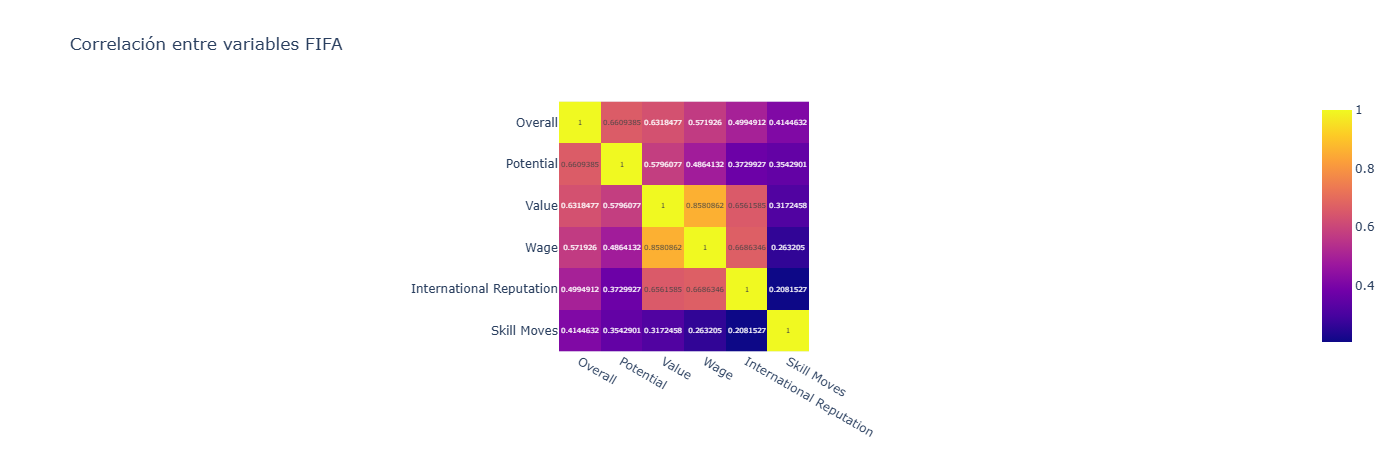

In [ ]:

# (Imagen .png)

#### Observaciones
- Existe una fuerte correlación entre el valor y el salario del jugador.<br>
- El rendimiento o calificación general se refleja en el valor y el salario.<br>
- El salario y valor tienen correlación moderada alta con la reputación internacional.<br>
- Para la calificación o rendimiento general, influyen el potencial, el valor, salario, reputación internacional, edad y técnica. <br>
- La edad influye en la calificación general, pero no en la técnica.<br>

In [6]:
# Se copia el dataframe para realizar cambios personalizados en los gráficos
df_graficos=df

In [7]:
# Columna nueva que filtra los valores que se quieren destacar con color en el gráfico, en este caso, jugadores de 22 a 33 años.
df_graficos['destacar']= df_graficos['Age'].apply(lambda x: 'destacado' if (x >= 22) & (x <= 33) else 'normal')

### Gráfico de correlación: ¿Cuál es la relación entre la edad y el Overall (calificación general)?

In [13]:
# Correlación entre Overall y Edad
fig= px.scatter(df_graficos, x='Age', y= 'Overall', 
                labels={'Age': 'Edad', 'Overall': 'Calificación general'}, # Etiquetas personalizadas
                title= 'Relación entre edad y calificación general',
                color="destacar",
                color_discrete_map={"normal": "grey", "destacado": "blue"}) # Hacemos énfasis en ciertos rangos de edad

In [ ]:
fig.update_layout(showlegend=False) # Se elimina la leyenda lateral
fig.show()

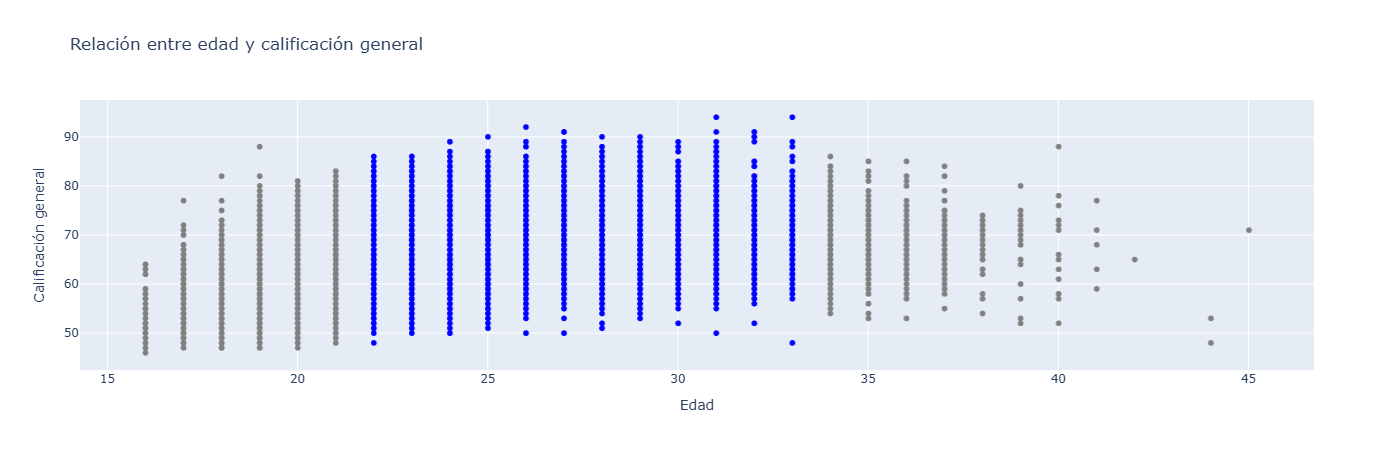

In [ ]:
# (Imagen .png)

#### Observaciones:

Los jugadores más jóvenes tienden a tener calificación o rendimiento  en desarrollo, que comienza a incrementar en jugadores de 22 a 33 años, parece haber un pico de rendimiento de 31 a 33 años. Hay pocos jugadores de más de 38 años, ya que tienden a descender en rendimiento.

In [27]:
# Conteo de jugadores por club
df_club= df.groupby(['Club']).size().rename('Cantidad_jugadores').reset_index()

In [52]:
df_club

,Club,Cantidad_jugadores
0,SSV Jahn Regensburg,29
1,1. FC Heidenheim 1846,28
2,1. FC Kaiserslautern,26
3,1. FC Köln,28
4,1. FC Magdeburg,26
...,...,...
647,Zagłębie Sosnowiec,25
648,Çaykur Rizespor,30
649,Örebro SK,27
650,Östersunds FK,22


In [53]:
# Filtro de jugadores no activos
df_club[df_club['Club']=='No activo']

,Club,Cantidad_jugadores
407,No activo,241


In [28]:
# Eliminamos el registro 407
df_club= df_club.drop(407, axis= 0) 

In [55]:
# Verificamos que el cambio se refleje en las dimensiones del dataframe
df_club.shape

(651, 2)

In [29]:
# Se ordenan los clubes por cantidad de jugadores para visualizar patrones en el gráfico
df_club= df_club.sort_values(by= 'Cantidad_jugadores')

In [57]:
df_club

,Club,Cantidad_jugadores
188,Derry City,18
544,Sligo Rovers,19
361,Limerick FC,19
46,América FC (Minas Gerais),20
62,Atlético Mineiro,20
...,...,...
584,Tottenham Hotspur,33
606,Valencia CF,33
641,Wolverhampton Wanderers,33
52,Arsenal,33


### Gráfico de barras de número de jugadores por club

In [ ]:
# Gráfico de barras por club, sin ordenar
fig= px.bar(df_club, x='Club', y= 'Cantidad_jugadores', title= 'Jugadores por Club')

In [30]:
# Para hacer el gráfico más simple:
# Ordenamos el dataframe por las plantillas o patrones comunes de jugadores, para realizar el conteo de clubes.
df_club= df_club[['Cantidad_jugadores', 'Club']]

In [31]:
# Conteo de las plantillas de jugadores: 18 a 33 jugadores por club.
club_counts= df_club['Cantidad_jugadores'].value_counts()

In [22]:
club_counts

Cantidad_jugadores
28    193
30    107
27     96
26     55
25     50
29     40
33     26
24     25
20     16
32     15
23     14
31      5
22      3
21      3
19      2
18      1
Name: count, dtype: int64

In [ ]:
club_counts_df= club_counts.to_frame()

In [ ]:
# Se convierte el objeto en un dataframe para poder personalizar el gráfico
club_counts_df.columns = ["Cantidad_jugadores", "Frecuencia"]

In [33]:
club_counts_df

,Cantidad_jugadores,Frecuencia
0,28,193
1,30,107
2,27,96
3,26,55
4,25,50
5,29,40
6,33,26
7,24,25
8,20,16
9,32,15


In [ ]:
# Nueva columna para personalizar los colores del gráfico, se van a destacar las barras con más de 95 en frecuencia
club_counts_df['destacar']=club_counts_df['Frecuencia'].apply(lambda x: 'destacado' if x > 95 else 'normal')

In [ ]:
# Gráfico de barras agrupado en plantillas por club
fig= px.bar(club_counts_df, x= 'Cantidad_jugadores', y= 'Frecuencia',
            labels= { 'Cantidad_jugadores': 'Cantidad de jugadores por club', 'Frecuencia': 'Número de clubes'}, # Etiquetas personalizadas
            title='Distribución de clubes según cantidad de jugadores',
            text= 'Cantidad_jugadores',
            color='destacar',                                                                                      
            color_discrete_map={"normal": "grey", "destacado": "blue"})                        # Personalización del gráfico, destacando las plantillas más frecuentes en azul


In [ ]:
fig.update_layout(showlegend=False, xaxis=dict(showticklabels=False))     # Eliminamos leyenda lateral y valores de x
fig.update_traces(textposition="inside", textfont=dict(size=14))             # Coloca valores dentro de las barras y ajusta el tamaño de la fuente
fig.show()

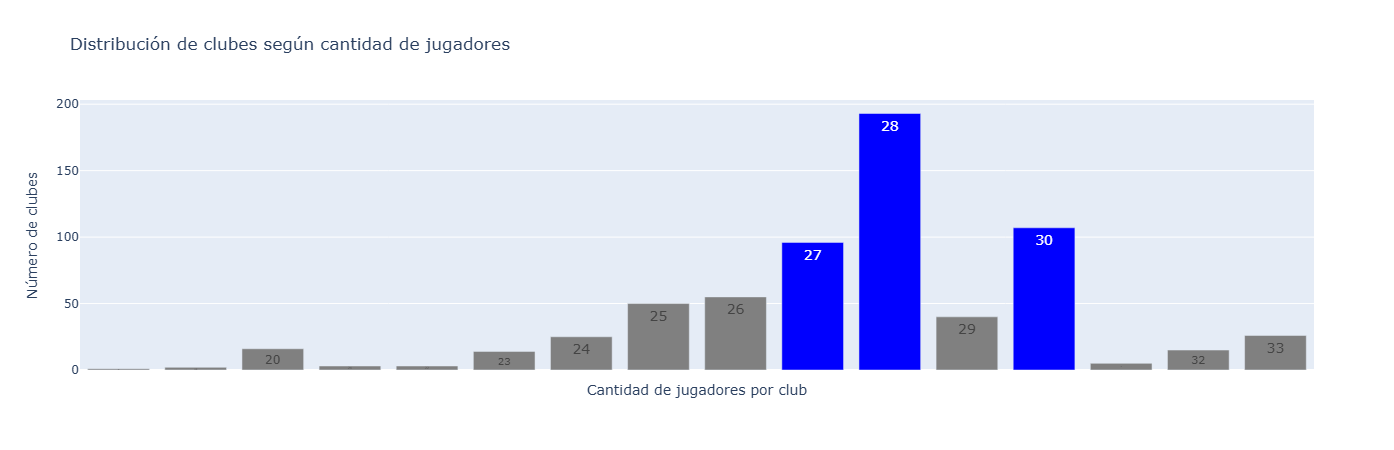

In [ ]:
# (Imagen .png)

#### Observaciones:

- Los clubes tienen entre 18 a 33 jugadores. Sin embargo la plantilla más común es de 28 jugadores, seguido de 30 y 27.

### Gráfico multipanel de relación de altura (height) vs skill moves, dividido en zurdos y diestros 

In [ ]:
fig= px.scatter(df_graficos, y='Height', x='Skill Moves', labels= {'Height': 'Altura', 'Skill Moves': 'Técnica'}, facet_col='Preferred Foot', color='Preferred Foot', title= 'Relación de altura y técnica')
fig.show()

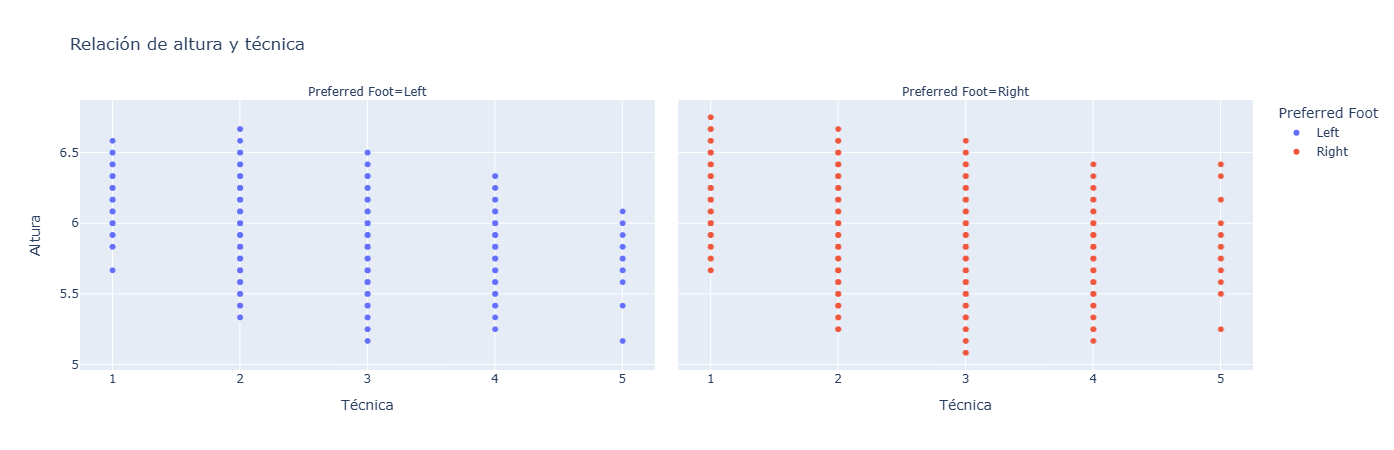

In [ ]:
# (Imagen .png)

#### Observaciones:
Los jugadores de menor estatura tienden a desarrollar mejor técnica:  
Los jugadores zurdos tienden a 5 puntos. Mientras que los diestros, de 4 a 5 puntos.


### Gráfico de los potenciales cracks

In [44]:
# Se podrían filtrar los jugadores jóvenes y con potencial igual o mayor a 85
potenciales= df[(df['Age'] <= 21) & (df['Potential'] >= 85)]

In [45]:
potenciales= potenciales.head(15)

In [46]:
potenciales= potenciales.sort_values(by='Potential', ascending= True)

In [47]:
potenciales

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause,destacar,destacar_tecnica
412,239207,M. Gómez,21,Uruguay,80,85,RC Celta,20500.0,25.0,Right,1.0,3.0,ST,2017,2022-01-01,6.083333,185.0,44600.0,normal,normal
234,224411,Gonçalo Guedes,21,Portugal,82,86,Valencia CF,29000.0,36.0,Right,1.0,4.0,LM,2018,2024-01-01,5.833333,150.0,63100.0,normal,normal
328,222509,Dani Ceballos,21,Spain,81,88,Real Madrid,25000.0,120.0,Right,1.0,4.0,LCM,2017,2023-01-01,5.833333,154.0,56300.0,normal,normal
236,222737,Malcom,21,Brazil,82,89,FC Barcelona,31500.0,140.0,Left,2.0,4.0,RW,2018,2023-01-01,5.666667,163.0,70900.0,normal,normal
319,231677,M. Rashford,20,England,81,89,Manchester United,27000.0,110.0,Right,2.0,4.0,LW,2014,2020-01-01,6.083333,154.0,55400.0,normal,normal
321,229906,L. Bailey,20,Jamaica,81,89,Bayer 04 Leverkusen,26500.0,54.0,Left,1.0,4.0,LM,2017,2023-01-01,5.833333,174.0,50400.0,normal,normal
413,235790,K. Havertz,19,Germany,80,89,Bayer 04 Leverkusen,22000.0,32.0,Left,1.0,4.0,CAM,2016,2022-01-01,6.166667,183.0,41800.0,normal,normal
323,228702,F. de Jong,21,Netherlands,81,89,Ajax,26000.0,19.0,Right,1.0,4.0,LDM,2015,2022-01-01,5.916667,154.0,41600.0,normal,normal
414,235569,T. Ndombele,21,France,80,89,Olympique Lyonnais,22500.0,51.0,Right,1.0,4.0,CM,2018,2023-01-01,5.916667,168.0,47300.0,normal,normal
228,230658,Arthur,21,Brazil,82,90,FC Barcelona,32500.0,125.0,Right,1.0,4.0,LCM,2018,2024-01-01,5.583333,161.0,73100.0,normal,normal


In [ ]:

fig= px.bar(potenciales, x='Potential', y='Name', labels= {'Potential': 'Potencial', 'Name': ''}, title= 'Potenciales jugadores', color= 'Potential', 
            color_continuous_scale= px.colors.sequential.Blues[3:])  # Personalización de la escala de tonos azules
fig.show()

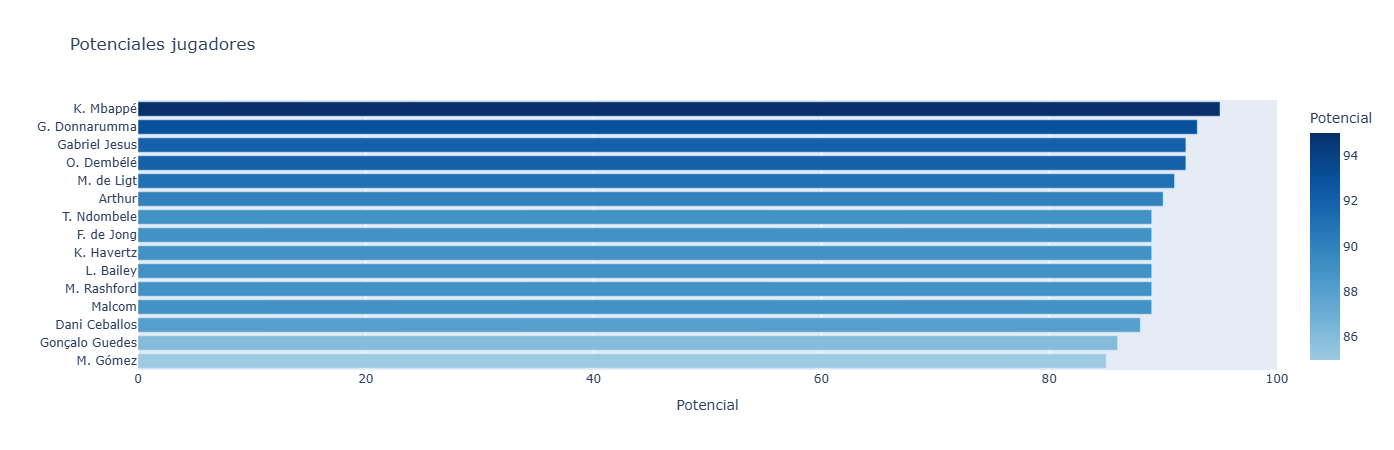

In [ ]:
# (Imagen .png)

#### Observaciones:
Los potenciales talentos son jóvenes menores de 22 años que tienen un potencial igual o mayor a 85 puntos, entre los principales están K.Mbappé, G. Donnarumma y Gabriel Jesus.